# Data Load and EDA

### Data load

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load the data set. In order not to exceed my RAM limit, I only loaded some columns, and I selected all the features under the Isolation category.

First of all, I want to explain that I did not choose Conso_ECS_é_primaire as follows:


1. The missing value ratio is very low, about 9.7e-7. Compared with other features, the missing value ratio of this feature is too low.
2. When I was doing data analysis, I found that the correlation between Conso_ECS_é_primaire and several other features is not high, and the introduction of Conso_ECS_é_primaire will have the effect of introducing noise instead. Therefore, I plan to perform separate data imputation on the Conso_ECS_é_primaire feature.


In [ ]:
df_DPE_dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dpe-v2-logements-existants.csv',
                usecols = ['Conso_ECS_é_primaire',
                      'Qualité_isolation_plancher_bas',
                      'Qualité_isolation_murs',
                      'Qualité_isolation_menuiseries',
                      'Qualité_isolation_plancher_haut_toit_terrase',
                      'Conso_5_usages_é_primaire',
                      'Conso_ECS_é_finale',
                      'Type_énergie_principale_ECS',
                      'Conso_é_finale_générateur_ECS_n°1',
                      'Conso_é_finale_générateur_ECS_n°2',
                      'Isolation_toiture_(0/1)',
                      'Deperditions_planchers_bas',
                      'Qualité_isolation_enveloppe',
                      'Déperditions_murs',
                      'Déperditions_portes',
                      'Deperditions_baies_vitrées',
                      'Deperditions_planchers_hauts',
                      'Qualité_isolation_plancher_haut_comble_aménagé',
                      'Qualité_isolation_plancher_haut_comble_perdu',
                      'Année_construction',
                      'Surface_habitable_immeuble',
                      'Surface_habitable_logement',
                      'Code_postal_(BAN)',
                      ],
                sep = ',')

I used a dictionary to map the column names of interest to their corresponding English names. And added Chinese notes (Chinese is my mother tongue)

In [ ]:
# Column name mapping dictionary
name_dict = {
    'Conso_ECS_é_primaire': 'Primary_ECS_Consumption',    # 初级能源消耗系统（ECS）消耗
    'Qualité_isolation_plancher_bas': 'Quality_insulation_lower_floor', # 低层地板绝缘质量
    'Qualité_isolation_murs': 'Quality_insulation_walls',   # 墙体绝缘质量
    'Qualité_isolation_menuiseries': 'Quality_insulation_carpentry',    # 木工绝缘质量
    'Qualité_isolation_plancher_haut_toit_terrase': 'Quality_insulation_upper_floor_roof_terrace',  # 顶楼地板及屋顶露台绝缘质量
    'Conso_5_usages_é_primaire': 'Primary_5_usages_consumption',    # 初级能源5用途消耗
    'Conso_ECS_é_finale': 'Final_ECS_Consumption',  # 最终能源消耗系统（ECS）消耗
    'Type_énergie_principale_ECS': 'Type_main_energy_ECS',  # 主要能源消耗系统（ECS）类型
    'Conso_é_finale_générateur_ECS_n°1': 'Final_consumption_ECS_generator_no1', # 能源消耗系统（ECS）发电机1最终消耗
    'Conso_é_finale_générateur_ECS_n°2': 'Final_consumption_ECS_generator_no2', # 能源消耗系统（ECS）发电机2最终消耗
    'Isolation_toiture_(0/1)': 'Roof_insulation_(0/1)',     # 屋顶绝缘（0/1）
    'Deperditions_planchers_bas': 'Losses_lower_floors',    # 底层楼板热量损失
    'Qualité_isolation_enveloppe': 'Quality_insulation_envelope',   # 围护结构绝缘质量
    'Déperditions_murs': 'Losses_walls',    # 墙体热量损失
    'Déperditions_portes': 'Losses_doors',  # 门的热量损失
    'Deperditions_baies_vitrées': 'Losses_glazed_bays',     # 玻璃窗户热量损失
    'Deperditions_planchers_hauts': 'Losses_upper_floors',      # 上层楼板热量损失
    'Qualité_isolation_plancher_haut_comble_aménagé': 'Quality_insulation_upper_floor_arranged_attic',  # 整理过的阁楼上层楼板绝缘质量
    'Qualité_isolation_plancher_haut_comble_perdu': 'Quality_insulation_upper_floor_lost_attic',    # 丢失的阁楼上层楼板绝缘质量
    'Année_construction': 'Year_construction',  # 建筑年份
    'Surface_habitable_immeuble': 'Living_area_building',   # 建筑物的居住面积
    'Surface_habitable_logement': 'Living_area_housing',    # 住房的居住面积
    'Code_postal_(BAN)': 'Postal_code_(BAN)',  # 邮政编码（BAN）

}

# 使用rename方法重命名列
df_DPE_dataset.rename(columns = name_dict, inplace = True)

In [ ]:
df_DPE_dataset

,Year_construction,Living_area_building,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Primary_ECS_Consumption,Roof_insulation_(0/1),Losses_glazed_bays,Losses_walls,...,Quality_insulation_envelope,Quality_insulation_carpentry,Quality_insulation_walls,Quality_insulation_lower_floor,Quality_insulation_upper_floor_roof_terrace,Quality_insulation_upper_floor_arranged_attic,Quality_insulation_upper_floor_lost_attic,Type_main_energy_ECS,Final_consumption_ECS_generator_no1,Final_consumption_ECS_generator_no2
0,1945.0,220.8,220.8,25000.0,4463.6,41345.2,6600.7,0.0,91.3,191.0,...,insuffisante,bonne,insuffisante,très bonne,NaN,NaN,insuffisante,Gaz naturel,2819.6,NaN
1,1948.0,NaN,70.6,13016.0,4522.1,15403.7,4522.1,NaN,16.1,134.9,...,insuffisante,bonne,insuffisante,très bonne,NaN,NaN,très bonne,Gaz naturel,1.0,NaN
2,1948.0,2200.0,109.0,93100.0,7035.3,63792.5,22815.4,NaN,764.5,5368.1,...,insuffisante,moyenne,insuffisante,moyenne,NaN,NaN,NaN,Électricité,2440.2,NaN
3,1976.0,3292.3,47.5,44800.0,2576.8,8334.7,3633.3,NaN,NaN,NaN,...,insuffisante,moyenne,insuffisante,insuffisante,NaN,NaN,NaN,NaN,NaN,NaN
4,1948.0,NaN,36.4,92330.0,1858.2,8857.1,1858.2,NaN,40.2,27.4,...,insuffisante,insuffisante,insuffisante,très bonne,NaN,NaN,très bonne,Gaz naturel,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277638,2013.0,46.4,46.4,44240.0,2486.1,4365.9,2486.1,1.0,7.9,4.3,...,très bonne,très bonne,insuffisante,très bonne,très bonne,NaN,NaN,Gaz naturel,2486.1,NaN
4277639,1960.0,3870.0,59.0,25000.0,2771.0,18778.5,3907.1,NaN,2362.8,5110.1,...,insuffisante,moyenne,insuffisante,insuffisante,NaN,NaN,NaN,Gaz naturel,181757.6,NaN
4277640,1945.0,NaN,70.0,44530.0,1864.7,36347.2,4288.8,1.0,35.5,92.5,...,insuffisante,insuffisante,insuffisante,moyenne,NaN,NaN,bonne,Électricité,1864.7,NaN
4277641,2014.0,1327.0,49.7,51100.0,1205.3,3842.7,1699.5,NaN,373.2,208.9,...,bonne,très bonne,très bonne,très bonne,NaN,NaN,NaN,Gaz naturel,32182.9,NaN


In [ ]:
# output the data type of different featurers
def print_dtypes(df):
    '''
    Func:
        print the list of data type in dataframe
    Input:
        df : Dataframe
    Output:
        No return

    '''
    for col in df.columns:
        print(f"{col}: {df[col].dtype}")

Observe the data type of features

In [ ]:
print('The type of the features in DPE dataset: \n')
print_dtypes(df_DPE_dataset)

The type of the features in DPE dataset: 

Year_construction: float64
Living_area_building: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64
Primary_ECS_Consumption: float64
Roof_insulation_(0/1): float64
Losses_glazed_bays: float64
Losses_walls: float64
Losses_lower_floors: float64
Losses_upper_floors: float64
Losses_doors: float64
Quality_insulation_envelope: object
Quality_insulation_carpentry: object
Quality_insulation_walls: object
Quality_insulation_lower_floor: object
Quality_insulation_upper_floor_roof_terrace: object
Quality_insulation_upper_floor_arranged_attic: object
Quality_insulation_upper_floor_lost_attic: object
Type_main_energy_ECS: object
Final_consumption_ECS_generator_no1: float64
Final_consumption_ECS_generator_no2: float64


In [ ]:
# output the missing ratio of featurers
def check_missing_values(df):
    '''
    Func:
        compute the missing ratio of features
    Input:
        df : Dataframe
    Output:
        feature: dictionary, store the missing ratio of features

    '''
    missing_values = df.isnull().mean()
    missing_features = missing_values[missing_values > 0].index.tolist()
    return {feature: missing_values[feature] for feature in missing_features}

In [ ]:
missing_results = check_missing_values(df_DPE_dataset)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in DPE data: \n')
print(df_missing_results)

The information about missing values in DPE data: 

                                          feature  missing_ratio
0                               Year_construction   3.183333e-01
1                            Living_area_building   6.773812e-01
2                             Living_area_housing   1.102546e-02
3                               Postal_code_(BAN)   5.146526e-03
4                           Final_ECS_Consumption   9.350944e-07
5                    Primary_5_usages_consumption   1.077696e-04
6                         Primary_ECS_Consumption   9.350944e-07
7                           Roof_insulation_(0/1)   3.249902e-01
8                              Losses_glazed_bays   8.814667e-03
9                                    Losses_walls   8.809992e-03
10                            Losses_lower_floors   9.711189e-03
11                            Losses_upper_floors   9.632407e-03
12                                   Losses_doors   9.063870e-03
13                       Quality_insul

### Quality_insulation_upper_floor_roof_terrace data

In [ ]:
df_insulation_roof = df_DPE_dataset[['Quality_insulation_upper_floor_roof_terrace',
                    'Quality_insulation_envelope',
                    # 'Quality_insulation_upper_floor_arranged_attic',
                    # 'Quality_insulation_upper_floor_lost_attic',
                    'Roof_insulation_(0/1)',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    ]]

In [ ]:
df_insulation_roof

,Quality_insulation_upper_floor_roof_terrace,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption
0,NaN,insuffisante,0.0,1945.0,220.8,25000.0,4463.6,41345.2
1,NaN,insuffisante,NaN,1948.0,70.6,13016.0,4522.1,15403.7
2,NaN,insuffisante,NaN,1948.0,109.0,93100.0,7035.3,63792.5
3,NaN,insuffisante,NaN,1976.0,47.5,44800.0,2576.8,8334.7
4,NaN,insuffisante,NaN,1948.0,36.4,92330.0,1858.2,8857.1
...,...,...,...,...,...,...,...,...
4277638,très bonne,très bonne,1.0,2013.0,46.4,44240.0,2486.1,4365.9
4277639,NaN,insuffisante,NaN,1960.0,59.0,25000.0,2771.0,18778.5
4277640,NaN,insuffisante,1.0,1945.0,70.0,44530.0,1864.7,36347.2
4277641,NaN,bonne,NaN,2014.0,49.7,51100.0,1205.3,3842.7


In [ ]:
print('The type of the features in insulation floor dataset: \n')
print_dtypes(df_insulation_roof)

The type of the features in insulation floor dataset: 

Quality_insulation_upper_floor_roof_terrace: object
Quality_insulation_envelope: object
Roof_insulation_(0/1): float64
Year_construction: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64


In [ ]:
missing_results = check_missing_values(df_insulation_roof)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in insulation floor data: \n')
print(df_missing_results)

The information about missing values in insulation floor data: 

                                       feature  missing_ratio
0  Quality_insulation_upper_floor_roof_terrace   8.391551e-01
1                        Roof_insulation_(0/1)   3.249902e-01
2                            Year_construction   3.183333e-01
3                          Living_area_housing   1.102546e-02
4                            Postal_code_(BAN)   5.146526e-03
5                        Final_ECS_Consumption   9.350944e-07
6                 Primary_5_usages_consumption   1.077696e-04


In [ ]:
def count_rows_with_n_nulls(df, n):
    null_counts = df.isnull().sum(axis=1)
    return (null_counts == n).sum()


In [ ]:
missing_row_1 = count_rows_with_n_nulls(df_insulation_roof, 1)
print(missing_row_1)

missing_row_2 = count_rows_with_n_nulls(df_insulation_roof, 2)
print(missing_row_2)

missing_row_3 = count_rows_with_n_nulls(df_insulation_roof, 3)
print(missing_row_3)

1806648
2123497
103033


In [ ]:
mapping = {'insuffisante': 0, 'moyenne': 1, 'bonne': 2, 'très bonne': 3}
df_insulation_roof_encoded = df_insulation_roof.replace(mapping)

In [ ]:
# Get data without missing values
df_insulation_roof_encoded_no_missing_values = df_insulation_roof_encoded.dropna()

In [ ]:
def process_postal_code(df):
    # Convert the zip code column to a string, and use str.zfill() to complete five digits
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)

    # Create a new column to store the processed zip code
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')

    # Convert the new column to float
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: float(x) if x != 'NaN' else float('nan'))

    return df

In [ ]:
df_insulation_roof_encoded_no_missing_values = process_postal_code(df_insulation_roof_encoded_no_missing_values)

<ipython-input-78-977e4c42af8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)
<ipython-input-78-977e4c42af8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')
<ipython-input-78-977e4c42af8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
import math
# Define a function for rounding a year to the nearest 10
def round_to_nearest_decade(year):
    return math.floor(year / 10) * 10

def process_year(df):
    df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)
    return df


In [ ]:
df_insulation_roof_encoded_no_missing_values = process_year(df_insulation_roof_encoded_no_missing_values)

<ipython-input-80-95aec6f7b944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)


In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df_insulation_roof_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    ]] = scaler.fit_transform(df_insulation_roof_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    ]])

<ipython-input-82-75a5146c8afc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulation_roof_encoded_no_missing_values[[


In [ ]:
df_insulation_roof_encoded_no_missing_values.describe()

,Quality_insulation_upper_floor_roof_terrace,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption
count,232369.000000,232369.000000,232369.000000,2.323690e+05,2.323690e+05,232369.000000,2.323690e+05,2.323690e+05
mean,1.156419,1.000904,0.762869,2.994218e-15,-1.639298e-16,53.664353,-1.278169e-17,-6.635471e-18
std,1.295134,1.105161,0.425324,1.000002e+00,1.000002e+00,27.061485,1.000002e+00,1.000002e+00
min,0.000000,0.000000,0.000000,-2.066553e+01,-9.598579e-01,1.000000,-1.008298e+00,-3.021885e-02
25%,0.000000,0.000000,1.000000,-6.511387e-01,-3.804140e-01,33.000000,-2.881361e-01,-1.664909e-02
50%,0.000000,1.000000,1.000000,1.602554e-01,-1.486364e-01,59.000000,-1.308710e-01,-8.809874e-03
75%,3.000000,2.000000,1.000000,7.011849e-01,1.563341e-01,76.000000,8.654296e-02,4.767742e-03
max,3.000000,3.000000,1.000000,3.405832e+00,9.668560e+01,97.000000,2.254388e+02,4.818430e+02


In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [ ]:
test_columns = [# 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]
df_insulation_roof_encoded_no_missing_values_outliers = remove_outliers(df_insulation_roof_encoded_no_missing_values, test_columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_insulation_roof_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]] = scaler.fit_transform(df_insulation_roof_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]])


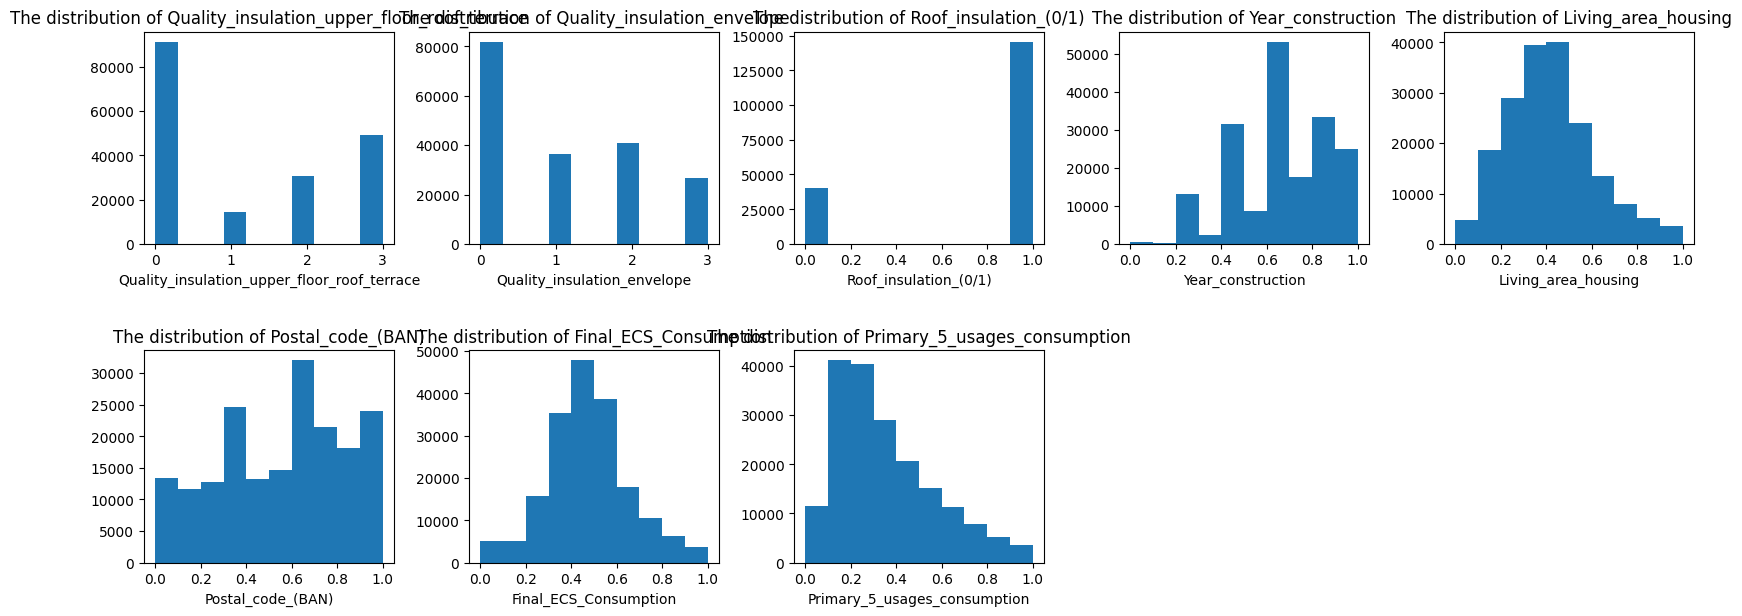

In [ ]:
check_columns = list(df_insulation_roof_encoded_no_missing_values_outliers.columns.values)
# check_class_balance(df_diabetic_data, check_columns)

plt.figure(figsize = (20, 40))
i = 1
column = check_columns

# plot the distributions
for col in column:
    plt.subplot(10, 5, i)
    plt.title('The distribution of {}'.format(col))
    plt.xlabel('{}'.format(col))
    # plt.ylabel('Count')
    plt.hist(df_insulation_roof_encoded_no_missing_values_outliers[col])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

<Axes: title={'center': 'Spearman Correlation of Features'}>

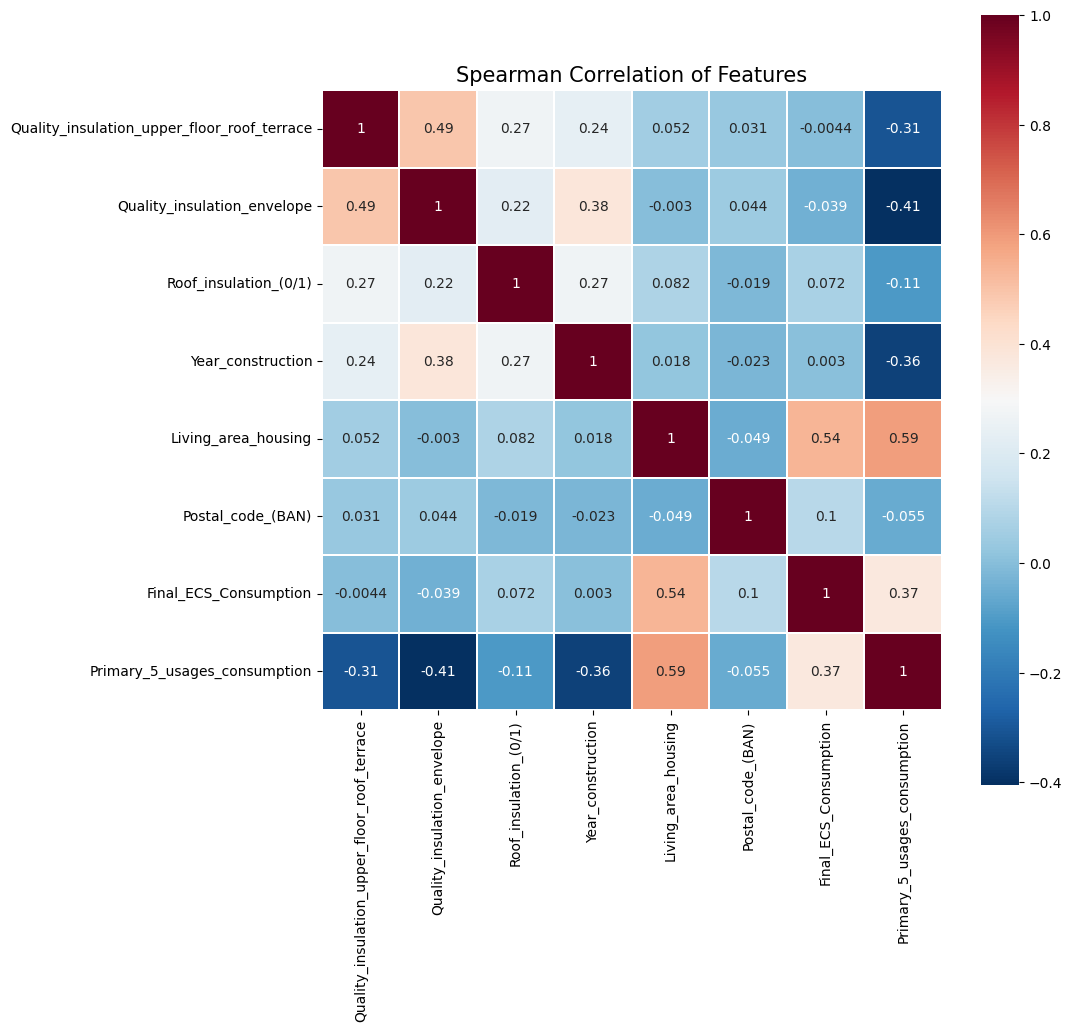

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Spearman Correlation of Features', size = 15)
sns.heatmap(df_insulation_roof_encoded_no_missing_values_outliers.astype(float).corr(method = 'spearman'), linewidths = 0.1, vmax = 1.0, square = True, cmap = 'RdBu_r', linecolor = 'white', annot = True)

### Plot functions

In [ ]:
def count_and_plot_completed_data(completed_data_numpy):
    '''
    Func:
        Count and plot the frequency of each value before imputation
    Input:
        df : Dataframe, no missing values.(Train set)
    Output:
        No Return

    '''
    # Count unique values in numpy array
    values, counts = np.unique(completed_data_numpy, return_counts = True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize = (10, 5))
    bars = plt.bar(values, counts, color = 'blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title('Count of unique values in completed data')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(percentage, 2), ha = 'center', va = 'bottom')

    plt.show()


In [ ]:
def count_and_plot_missing_data(missing_data_numpy, mask):
    '''
    Func:
        Count and plot the frequency of each value in imputated data.
    Input:
        df : Dataframe, imputated data.
        mask : The position of the missing value in the array.
    Output:
        No Return

    '''
    # Apply mask to numpy array
    masked_data = missing_data_numpy[mask]

    # Count unique values in numpy array
    values, counts = np.unique(masked_data, return_counts=True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize=(10,5))
    bars = plt.bar(values, counts, color='blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title('Count of unique values in masked numpy array')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(percentage, 2), ha='center', va='bottom')

    plt.show()


In [ ]:
def count_and_plot_missing_data(df, column_name, mask):
    '''
    Func:
        Count and plot the frequency of each value in imputed data.
    Input:
        df : Dataframe, imputed data.
        mask : The position of the missing value in the array.
        column_name : String, the name of the column to be plotted.
    Output:
        No Return

    '''
    # Get the column index
    column_index = df.columns.get_loc(column_name)

    # Apply mask to the specific column in the numpy array
    masked_data = df.values[mask, column_index]

    # Count unique values in numpy array
    values, counts = np.unique(masked_data, return_counts=True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize=(10,5))
    bars = plt.bar(values, counts, color='blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title(f'Count of unique values in masked numpy array for {column_name}')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(percentage, 2), ha='center', va='bottom')

    plt.show()


# Traditional DAE for upper_floor_roof_terrace

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.4078138470649719
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.28419795632362366
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2719763517379761
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.26413941383361816
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2514151632785797
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23873257637023926
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.23128479719161987
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.22961612045764923
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.2283296287059784
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.22800208628177643
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.22719062864780426
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.2267221361398697
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22657091915607452
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2264157235622406
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.22615006566047668
Noise Epoch 1/1, Iteratio

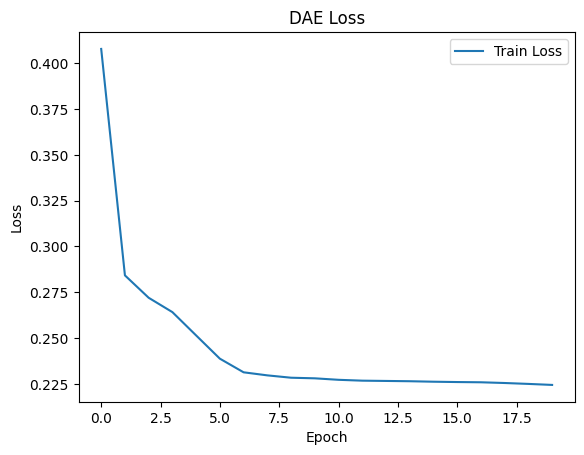

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result_upper_floor_roof_terrace.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.8425143, shape=(), dtype=float32)
Loss: tf.Tensor(0.33136135, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.46148676, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.8603966, shape=(), dtype=float32)
Loss: tf.Tensor(0.33119264, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.46489614, shape=(), dtype=float32)


# DE-DAE for upper_floor_roof_terrace

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
len(dae_dataset)

186028

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.30802664160728455
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.22727438807487488
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.20847274363040924
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.19292791187763214
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.18333807587623596
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.17954136431217194
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.17789116501808167
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.1770409345626831
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.17649796605110168
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.17575578391551971
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.17538033425807953
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.1749812215566635
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.17484141886234283
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.1746513694524765
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.17445077002048492
Noise Epoch 1/1, Itera

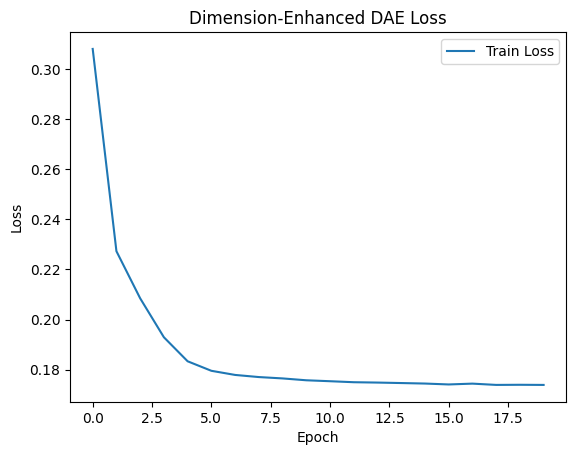

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_result_upper_floor_roof_terrace.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.82504773, shape=(), dtype=float32)
Loss: tf.Tensor(0.30612072, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.47633296, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.7874048, shape=(), dtype=float32)
Loss: tf.Tensor(0.30177546, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.49667466, shape=(), dtype=float32)


# DE-DAE-MD for upper_floor_roof_terrace

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  1.2492352724075317
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.8753988742828369
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.879883348941803
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.8613423109054565
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.8577783703804016
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.8540551662445068
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.8518862128257751
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.8505139350891113
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.8382092714309692
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.8354290723800659
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.8456061482429504
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.8328760862350464
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.8306522965431213
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.8297014832496643
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.8282233476638794
Noise Epoch 1/1, Iteration 16/20
Tr

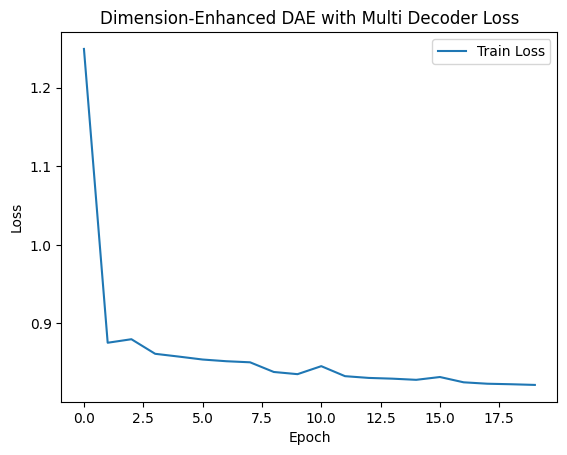

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE with Multi Decoder Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_md_result_upper_floor_roof_terrace.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.9168449, shape=(), dtype=float32)
Loss: tf.Tensor(0.32690224, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5735294, shape=(), dtype=float32)


<ipython-input-192-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.891258, shape=(), dtype=float32)
Loss: tf.Tensor(0.32027066, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57649255, shape=(), dtype=float32)


<ipython-input-192-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# Ensemble Model for Quality_insulation_upper_floor_roof_terrace

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
len(dae_dataset)

186028

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

,Quality_insulation_upper_floor_roof_terrace,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption
count,148822.000000,148822.000000,148822.00000,148822.000000,148822.000000,148822.000000,148822.000000,148822.000000
mean,1.205581,1.064426,0.78305,0.649285,0.418883,0.551313,0.475572,0.354479
std,1.294332,1.108516,0.41217,0.207831,0.191705,0.278161,0.179310,0.215750
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.00000,0.466667,0.283259,0.333333,0.366148,0.186964
50%,1.000000,1.000000,1.00000,0.666667,0.402928,0.604167,0.468013,0.300377
75%,3.000000,2.000000,1.00000,0.800000,0.525780,0.781250,0.572477,0.482204
max,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(x_train)

148822

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 14s 11ms/step - loss: 1.2843
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8772
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 11ms/step - loss: 0.8681
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 7s 12ms/step - loss: 0.9078
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8525
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8453
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8397
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 11ms/step - loss: 0.8332
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 7s 13ms/step - loss: 0.8277
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 14s 12ms/step - loss: 1.4844
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8871
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8716
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8696
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8624
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8581
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8659
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8484
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8439
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 13s 11ms/step - loss: 1.1370
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 0.9075
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8583
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8478
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8373
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8421
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8337
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8263
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 7s 11ms/step - loss: 0.8242
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_roof_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_roof_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_roof_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
4651/4651 [==============================] - 15s 3ms/step - loss: 1.0270 - accuracy: 0.5834 - val_loss: 0.9940 - val_accuracy: 0.5850
Epoch 2/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9781 - accuracy: 0.6025 - val_loss: 0.9690 - val_accuracy: 0.6109
Epoch 3/10
4651/4651 [==============================] - 15s 3ms/step - loss: 0.9673 - accuracy: 0.6088 - val_loss: 0.9605 - val_accuracy: 0.6145
Epoch 4/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9588 - accuracy: 0.6149 - val_loss: 0.9520 - val_accuracy: 0.6201
Epoch 5/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9485 - accuracy: 0.6238 - val_loss: 0.9404 - val_accuracy: 0.6333
Epoch 6/10
4651/4651 [==============================] - 15s 3ms/step - loss: 0.9347 - accuracy: 0.6322 - val_loss: 0.9264 - val_accuracy: 0.6370
Epoch 7/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9204 - accuracy: 0.6390 - val_loss: 0.9122 - val_ac

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.77989274, shape=(), dtype=float32)
Loss: tf.Tensor(0.32147506, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.613941, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.93012404, shape=(), dtype=float32)
Loss: tf.Tensor(0.33267924, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5655421, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.90030986, shape=(), dtype=float32)
Loss: tf.Tensor(0.33234558, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57308364, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.88205403, shape=(), dtype=float32)
Loss: tf.Tensor(0.32848695, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5790318, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.82884204, shape=(), dtype=float32)
Loss: tf.Tensor(0.31938615, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.59324974, shape=(), dtype=float32)


<ipython-input-343-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.82300884, shape=(), dtype=float32)
Loss: tf.Tensor(0.31085962, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.60579246, shape=(), dtype=float32)


<ipython-input-343-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_upper_floor_roof_terrace')], 'Quality_insulation_upper_floor_roof_terrace']

3833774    0.0
2646308    0.0
2056320    0.0
615092     0.0
3835703    0.0
          ... 
827324     0.0
1624091    0.0
1635658    0.0
3646983    0.0
3655147    0.0
Name: Quality_insulation_upper_floor_roof_terrace, Length: 7460, dtype: float64

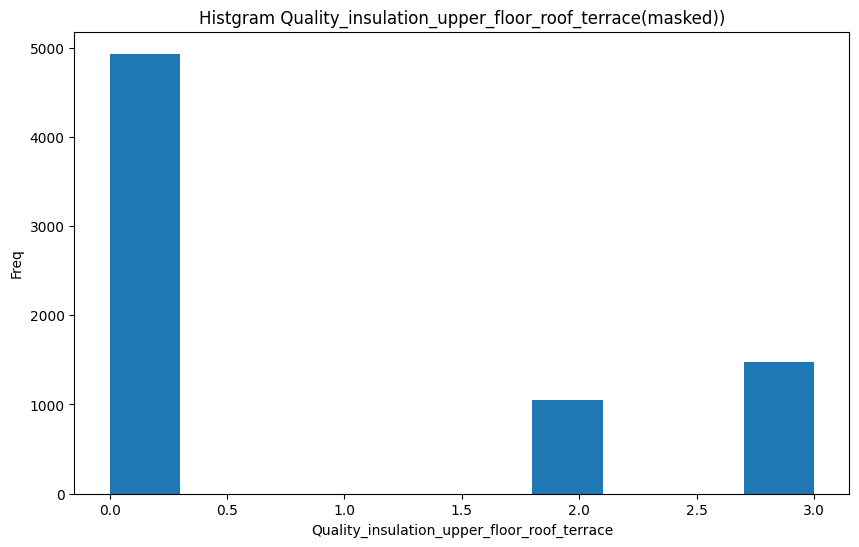

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)